In [18]:
from os.path import join, basename
from glob import glob
import rioxarray as rxa
import matplotlib.pyplot as plt

In [100]:
data_dir = '/SNOWDATA/IDALS/2022/'
bare_earth = rxa.open_rasterio('/SNOWDATA/IDALS/REF_DEM/DC_REFDEM_WGS84.tif')

In [115]:
# a,b,c,d = [rxa.open_rasterio(f) for f in sorted(glob(join(data_dir, '*_DC/ice-road/*-snowdepth.tif')))][:4]
sds = {}
for i, f in enumerate(sorted(glob(join(data_dir, '*_MCS/ice-road/*-snowdepth.tif')))[:3]):
    im = rxa.open_rasterio(f)
    if i == 0:
        im = im.rio.reproject(dst_crs= im.rio.crs, shape = [int(i/10) for i in im.shape[1:]])
        im_base = im.copy()
    else:
        im = im.rio.reproject_match(im_base)
    sds[basename(f).split('-')[0]] = im

In [116]:
a,b,c = sds.values()

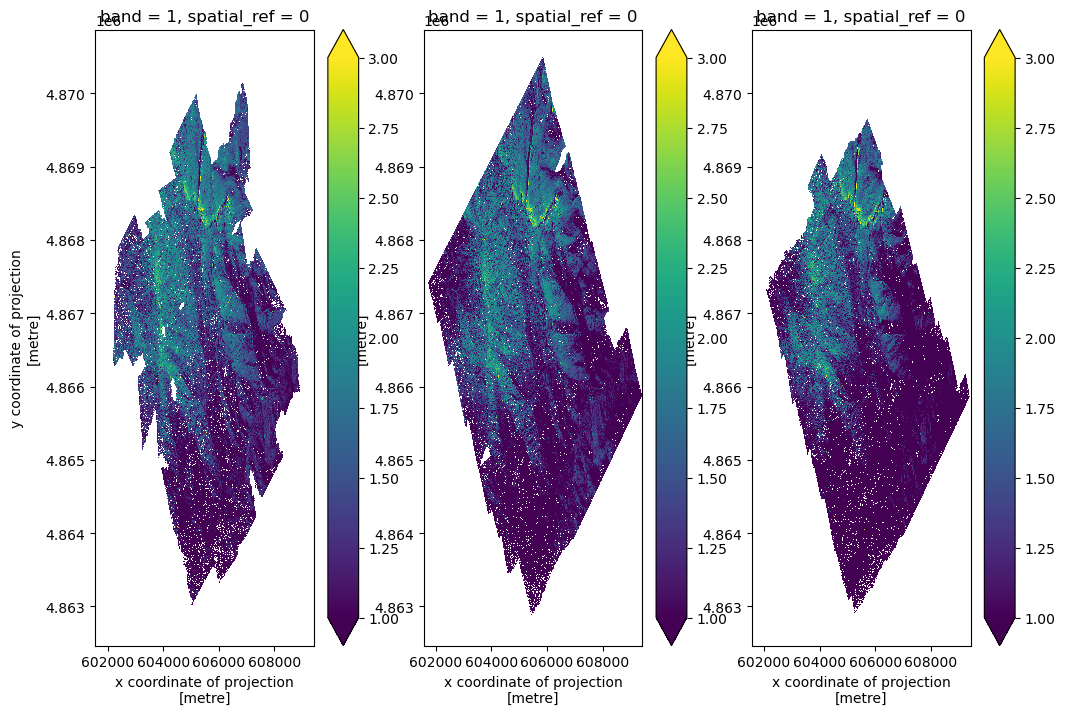

In [117]:
f,axes = plt.subplots(1,3, figsize = (12,8))
a.plot(ax = axes[0], vmax = 3, vmin = 1)
b.plot(ax = axes[1], vmax = 3, vmin = 1)
c.plot(ax = axes[2], vmax = 3, vmin = 1)

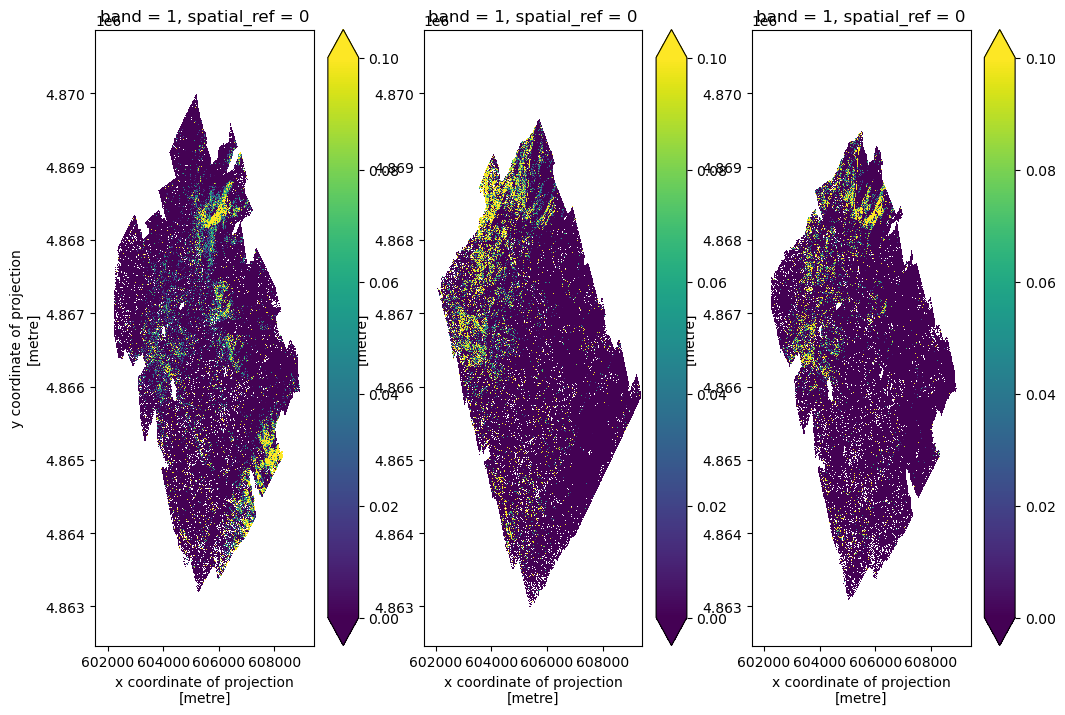

In [118]:
f,axes = plt.subplots(1,3, figsize = (12,8))
(b-a).plot(ax = axes[0], vmax = 0.1, vmin = 0)
(c-b).plot(ax = axes[1], vmax = 0.1, vmin = 0)
(c-a).plot(ax = axes[2], vmax = 0.1, vmin = 0)

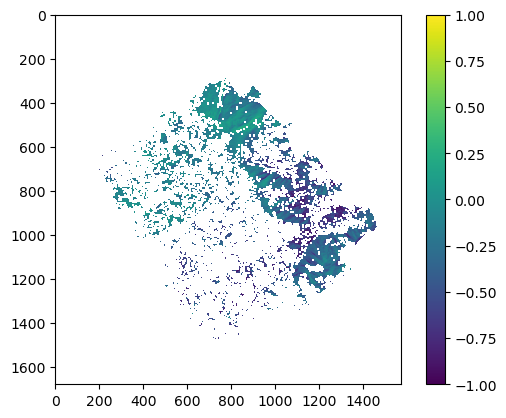

In [127]:
arr = a.values[0]
barr = b.values[0]
carr = c.values[0]
closurearr = ((c-b) + (b-a))
plt.imshow(closurearr[0], vmax = 1, vmin = -1)
plt.colorbar()

In [128]:
plt.hist(closurearr[0])

/home/zacharykeskinen/miniconda3/envs/iceroad/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6613: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/zacharykeskinen/miniconda3/envs/iceroad/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6614: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


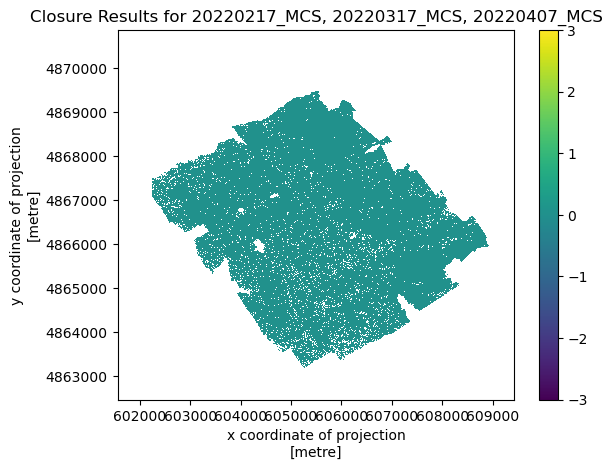

In [119]:
closure = (((b-a) + (c -b )) - (c - a))
closure.where((closure < 10) & (closure > -10)).plot(vmin = -3, vmax = 3)
plt.title('Closure Results for ' + ', '.join(sds.keys()))
plt.gca().ticklabel_format(style='plain')

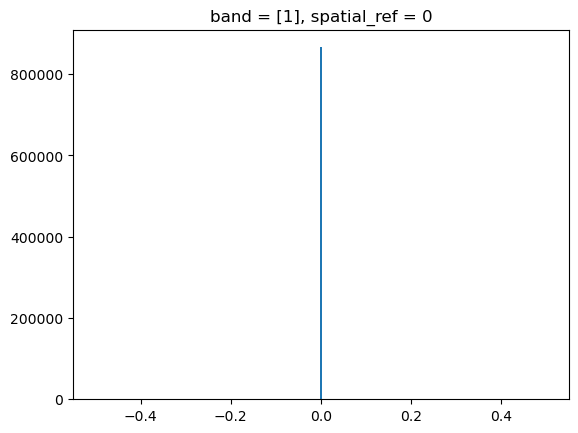

In [120]:
closure.where((closure < 10) & (closure > -10)).plot.hist(bins = 201)
plt.show()